In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import silhouette_score

In [37]:
df = pd.read_csv("./dataset/Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [38]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


Text(0.5, 1.0, 'Iris')

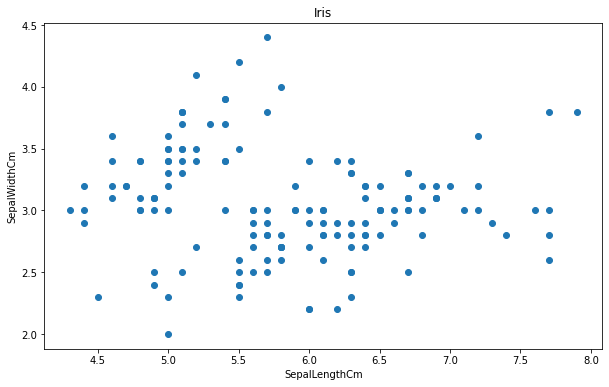

In [39]:
plt.figure(figsize=(10,6))
plt.scatter(df['SepalLengthCm'],df['SepalWidthCm'])
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.title('Iris')

In [40]:
X = df.iloc[:, [1,2]].values
X[:5]

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6]])

In [41]:
X[1,1]

3.0

In [42]:
len(X)

150

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


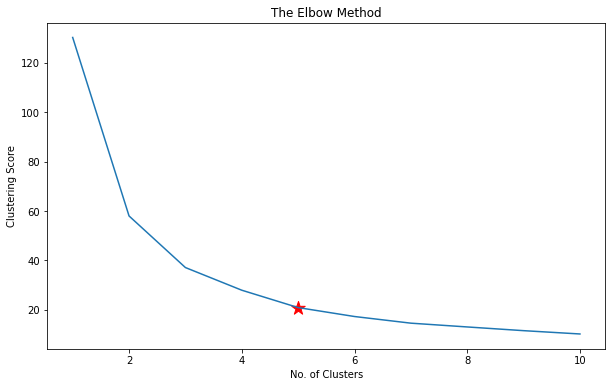

In [43]:
clustering_score = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'random', random_state = 42)
    #kmeans = KMeans(n_clusters=i, init ='k-means++',random_state=0 )
    kmeans.fit(X)
    clustering_score.append(kmeans.inertia_) # inertia_ = Sum of squared distances of samples to their closest cluster center.

plt.figure(figsize=(10,6))
plt.plot(range(1, 11), clustering_score)
plt.scatter(5,clustering_score[4], s = 200, c = 'red', marker='*')
plt.title('The Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('Clustering Score')
plt.show()

In [44]:
kmeans= KMeans(n_clusters = 5, random_state = 42)

# Compute k-means clustering
kmeans.fit(X)

# Compute cluster centers and predict cluster index for each sample.
pred = kmeans.predict(X)

pred

array([0, 3, 3, 3, 0, 0, 3, 0, 3, 3, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 3, 0, 0, 0, 3, 3, 0, 0, 0, 3, 3, 0, 3, 3, 0, 0, 3, 3, 0,
       0, 3, 0, 3, 0, 0, 1, 1, 1, 2, 1, 2, 1, 3, 1, 3, 3, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2,
       2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 3, 2, 1, 2, 4, 1, 1, 4, 3, 4, 1, 4,
       1, 1, 1, 2, 2, 1, 1, 4, 4, 2, 1, 2, 4, 2, 1, 4, 2, 2, 1, 4, 4, 4,
       1, 1, 2, 4, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2])

In [45]:
score = silhouette_score(X, pred)
print("Silhouette Score:", score)

Silhouette Score: 0.41512382232807116


In [46]:
len(pred)

150

In [47]:
df['Cluster'] = pd.DataFrame(pred, columns=['cluster'] )
print('Number of data points in each cluster= \n', df['Cluster'].value_counts())

Number of data points in each cluster= 
 2    45
1    37
0    31
3    25
4    12
Name: Cluster, dtype: int64


Text(0.5, 1.0, 'Clusters')

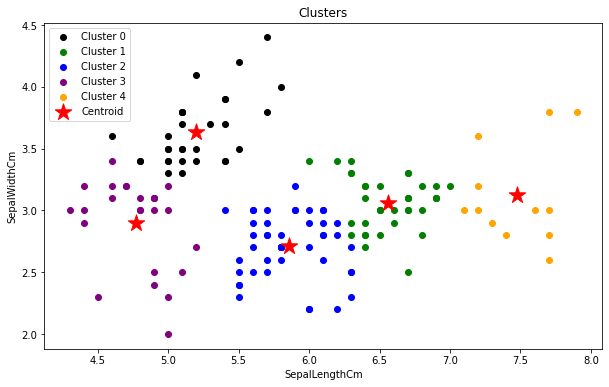

In [48]:
plt.figure(figsize=(10,6))
plt.scatter(X[pred == 0, 0], X[pred == 0, 1], c = 'black', label = 'Cluster 0')
plt.scatter(X[pred == 1, 0], X[pred == 1, 1], c = 'green', label = 'Cluster 1')
plt.scatter(X[pred == 2, 0], X[pred == 2, 1], c = 'blue', label = 'Cluster 2')
plt.scatter(X[pred == 3, 0], X[pred == 3, 1], c = 'purple', label = 'Cluster 3')
plt.scatter(X[pred == 4, 0], X[pred == 4, 1], c = 'orange', label = 'Cluster 4')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1],s = 300, c = 'red', label = 'Centroid', marker='*')

plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.legend()
plt.title('Clusters')

In [49]:
kmeans.cluster_centers_[:,0]

array([5.19677419, 6.56216216, 5.85777778, 4.772     , 7.475     ])

In [50]:
kmeans.cluster_centers_[:,1]

array([3.63870968, 3.05945946, 2.71333333, 2.9       , 3.125     ])

In [51]:
distance = []
max0 = max1 = max2 = max3 = max4 = 0
for i in range(0, len(X)):
    if pred[i]==0:
        d = np.sqrt((X[:, 0][i] - kmeans.cluster_centers_[:,0][0])**2+(X[:, 1][i] - kmeans.cluster_centers_[:,1][0])**2)
        if d>max0:
            max0=d
    if pred[i]==1:
        d = np.sqrt((X[:, 0][i] - kmeans.cluster_centers_[:,0][1])**2+(X[:, 1][i] - kmeans.cluster_centers_[:,1][1])**2)
        if d>max1:
            max1=d
    if pred[i]==2:
        d = np.sqrt((X[:, 0][i] - kmeans.cluster_centers_[:,0][2])**2+(X[:, 1][i] - kmeans.cluster_centers_[:,1][2])**2)
        if d>max2:
            max2=d
    if pred[i]==3:
        d = np.sqrt((X[:, 0][i] - kmeans.cluster_centers_[:,0][3])**2+(X[:, 1][i] - kmeans.cluster_centers_[:,1][3])**2)
        if d>max3:
            max3=d
    if pred[i]==4:
        d = np.sqrt((X[:, 0][i] - kmeans.cluster_centers_[:,0][4])**2+(X[:, 1][i] - kmeans.cluster_centers_[:,1][4])**2)
        if d>max4:
            max4=d
    distance.append(d) 

In [52]:
distance

[0.169131957792495,
 0.16243152403397576,
 0.3085190431723789,
 0.26378779350076126,
 0.2005455618370269,
 0.33101867180297545,
 0.5287570330501526,
 0.30935803422615477,
 0.3719999999999999,
 0.23745315327449348,
 0.21226688872725288,
 0.4630465103632959,
 0.10384603988597733,
 0.4824769424542487,
 0.7031444167165268,
 0.9125783076173898,
 0.33101867180297545,
 0.169131957792495,
 0.528441842057425,
 0.18809522241436483,
 0.31350125757572467,
 0.1145501993842892,
 0.598028324756645,
 0.35226338173938027,
 0.4630465103632959,
 0.24896586111352678,
 0.30935803422615477,
 0.13874718172649395,
 0.23873147241391474,
 0.3085190431723789,
 0.20195048898182952,
 0.31350125757572467,
 0.46130160148629296,
 0.6379598074494315,
 0.23745315327449348,
 0.37680764323458205,
 0.3334460440731187,
 0.23745315327449348,
 0.3852064381601117,
 0.2575801906797053,
 0.24074978267155248,
 0.6587746200332859,
 0.47789538604175713,
 0.24074978267155248,
 0.18809522241436483,
 0.10384603988597733,
 0.188095222

In [53]:
len(distance)

150

In [54]:
max0

0.9125783076173898

In [55]:
max1

0.6572626235520176

In [56]:
max2

0.6169498849127271

In [57]:
max3

0.9284309344264654

In [58]:
max4

0.7976528066771911

In [59]:
l0 = float(input("Enter lambda 0 value: "))
l1 = float(input("Enter lambda 1 value: "))
l2 = float(input("Enter lambda 2 value: "))
l3 = float(input("Enter lambda 3 value: "))
l4 = float(input("Enter lambda 4 value: "))

Enter lambda 0 value: 0.6
Enter lambda 1 value: 0.3
Enter lambda 2 value: 0.3
Enter lambda 3 value: 0.6
Enter lambda 4 value: 0.4


Text(0.5, 1.0, 'Clusters')

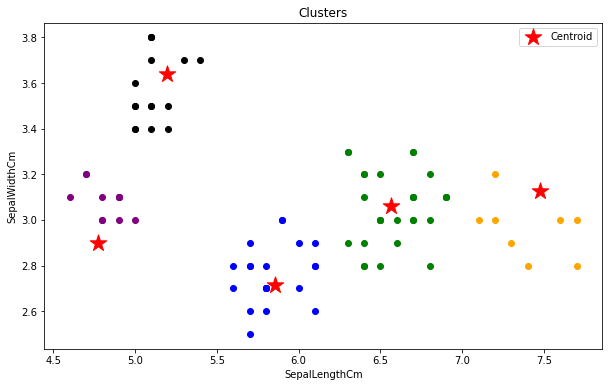

In [60]:
c0=c1=c2=c3=c4=0
coordinates =[]
plt.figure(figsize=(10,6))
for i in range(0, len(X)):
    if pred[i]==0:
        if distance[i]<=max0-l0:
            plt.scatter(X[pred == 0, 0][c0], X[pred == 0, 1][c0], c = 'black')#, label = 'Cluster 0')
            coordinates.append((X[pred == 0, 0][c0],X[pred == 0, 1][c0]))
            c0=c0+1
        else:
            c0=c0+1
    if pred[i]==1:
        if distance[i]<=max1-l1:
            plt.scatter(X[pred == 1, 0][c1], X[pred == 1, 1][c1], c = 'green')#, label = 'Cluster 1')
            coordinates.append((X[pred == 1, 0][c1],X[pred == 1, 1][c1]))
            c1=c1+1
        else:
            c1=c1+1
    if pred[i]==2:
        if distance[i]<=max2-l2:
            plt.scatter(X[pred == 2, 0][c2], X[pred == 2, 1][c2], c = 'blue')#, label = 'Cluster 2')
            coordinates.append((X[pred == 2, 0][c2],X[pred == 2, 1][c2]))
            c2=c2+1
        else:
            c2=c2+1
    if pred[i]==3:
        if distance[i]<=max3-l3:
            plt.scatter(X[pred == 3, 0][c3], X[pred == 3, 1][c3], c = 'purple')#, label = 'Cluster 3')
            coordinates.append((X[pred == 3, 0][c3],X[pred == 3, 1][c3]))
            c3=c3+1
        else:
            c3=c3+1
    if pred[i]==4:
        if distance[i]<=max4-l4:
            plt.scatter(X[pred == 4, 0][c4], X[pred == 4, 1][c4], c = 'orange')# , label = 'Cluster 4')
            coordinates.append((X[pred == 4, 0][c4],X[pred == 4, 1][c4]))
            c4=c4+1
        else:
            c4=c4+1
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1],s = 300, c = 'red', label = 'Centroid', marker='*')
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.legend()
plt.title('Clusters')

In [61]:
coordinates

[(5.1, 3.5),
 (4.9, 3.0),
 (4.7, 3.2),
 (4.6, 3.1),
 (5.0, 3.6),
 (5.0, 3.4),
 (4.9, 3.1),
 (5.4, 3.7),
 (4.8, 3.0),
 (5.1, 3.5),
 (5.1, 3.8),
 (5.1, 3.7),
 (5.0, 3.0),
 (5.0, 3.4),
 (5.2, 3.5),
 (5.2, 3.4),
 (4.7, 3.2),
 (4.8, 3.1),
 (4.9, 3.1),
 (4.9, 3.1),
 (5.1, 3.4),
 (5.0, 3.5),
 (5.0, 3.5),
 (5.1, 3.8),
 (4.8, 3.0),
 (5.1, 3.8),
 (5.3, 3.7),
 (6.4, 3.2),
 (6.9, 3.1),
 (6.5, 2.8),
 (5.7, 2.8),
 (6.3, 3.3),
 (6.6, 2.9),
 (5.9, 3.0),
 (6.1, 2.9),
 (6.7, 3.1),
 (5.8, 2.7),
 (6.1, 2.8),
 (6.1, 2.8),
 (6.4, 2.9),
 (6.6, 3.0),
 (6.8, 2.8),
 (6.7, 3.0),
 (6.0, 2.9),
 (5.7, 2.6),
 (5.8, 2.7),
 (6.0, 2.7),
 (6.7, 3.1),
 (5.8, 2.6),
 (5.6, 2.7),
 (5.7, 2.9),
 (5.7, 2.8),
 (6.3, 3.3),
 (5.8, 2.7),
 (7.1, 3.0),
 (6.3, 2.9),
 (6.5, 3.0),
 (7.6, 3.0),
 (7.3, 2.9),
 (6.5, 3.2),
 (6.8, 3.0),
 (5.7, 2.5),
 (5.8, 2.8),
 (6.4, 3.2),
 (6.5, 3.0),
 (5.6, 2.8),
 (7.7, 2.8),
 (6.7, 3.3),
 (7.2, 3.2),
 (6.4, 2.8),
 (7.2, 3.0),
 (7.4, 2.8),
 (6.4, 2.8),
 (6.1, 2.6),
 (7.7, 3.0),
 (6.4, 3.1),
 (6.9, 3.1),

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


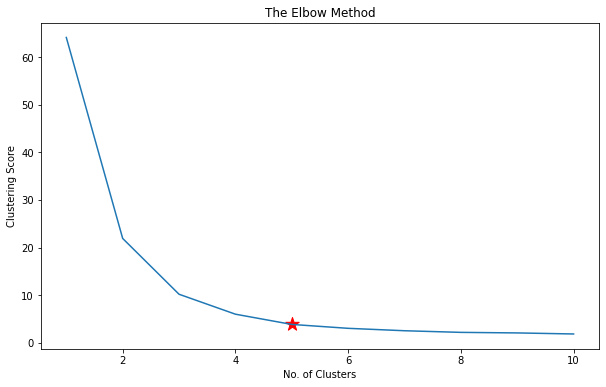

In [62]:
clustering_score = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'random', random_state = 42)
    #kmeans = KMeans(n_clusters=i, init ='k-means++',random_state=0 )
    kmeans.fit(coordinates)
    clustering_score.append(kmeans.inertia_) # inertia_ = Sum of squared distances of samples to their closest cluster center.

plt.figure(figsize=(10,6))
plt.plot(range(1, 11), clustering_score)
plt.scatter(5,clustering_score[4], s = 200, c = 'red', marker='*')
plt.title('The Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('Clustering Score')
plt.show()

In [63]:
kmeans= KMeans(n_clusters = 5, random_state = 42)

# Compute k-means clustering
kmeans.fit(coordinates)

# Compute cluster centers and predict cluster index for each sample.
pred = kmeans.predict(coordinates)

pred

array([1, 4, 4, 4, 1, 1, 4, 1, 4, 1, 1, 1, 4, 1, 1, 1, 4, 4, 4, 4, 1, 1,
       1, 1, 4, 1, 1, 3, 3, 3, 0, 3, 3, 0, 0, 3, 0, 0, 0, 3, 3, 3, 3, 0,
       0, 0, 0, 3, 0, 0, 0, 0, 3, 0, 2, 3, 3, 2, 2, 3, 3, 0, 0, 3, 3, 0,
       2, 3, 2, 3, 2, 2, 3, 0, 2, 3, 3, 3, 3, 0, 3, 3, 3, 3, 0])

In [64]:
score = silhouette_score(coordinates, pred)
print("Silhouette Score:", score)

Silhouette Score: 0.5903705466853972


In [65]:
kmeans.cluster_centers_[:,0]

array([5.84285714, 5.1125    , 7.4       , 6.5862069 , 4.81818182])

In [66]:
kmeans.cluster_centers_[:,1]

array([2.76190476, 3.575     , 2.9625    , 3.05517241, 3.08181818])

In [63]:
from platform import python_version

print(python_version())

3.9.12
